In [1]:
import os
from PIL import Image
import io

import mmcv
from mmdet.apis import DetInferencer
from mmdet.models.backbones.swin import SwinTransformer

import torch
import tensorrt
import torch_tensorrt
from torch.export import Dim

import torch.utils.benchmark as benchmark

torch_tensorrt.runtime.set_multi_device_safe_mode(False)
torch._logging.set_logs(dynamic=10) # verbose logging
# torch._logging.set_logs(dynamo=logging.DEBUG, aot=logging.DEBUG, inductor=logging.DEBUG)

# to debug the guard of interest
# TORCHDYNAMO_EXTENDED_DEBUG_GUARD_ADDED="..."


from codetr.codetr import build_CoDETR

Unable to import quantization op. Please install modelopt library (https://github.com/NVIDIA/TensorRT-Model-Optimizer?tab=readme-ov-file#installation) to add support for compiling quantized models
TensorRT-LLM is not installed. Please install TensorRT-LLM or set TRTLLM_PLUGINS_PATH to the directory containing libnvinfer_plugin_tensorrt_llm.so to use converters for torch.distributed ops


[03/21/2025-22:25:38] [TRT] [W] Functionality provided through tensorrt.plugin module is experimental.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [3]:
mmdetection_dir = "/home/bryan/src/mmdetection"

model_file = os.path.join(mmdetection_dir, "projects/CO-DETR/configs/codino/co_dino_5scale_swin_l_16xb1_16e_o365tococo.py") 
weights = "/home/bryan/expr/co-detr/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth"

demo_jpg = "/home/bryan/src/mmdetection/demo/demo.jpg"

In [23]:
device = "cuda:0"
inferencer = DetInferencer(
    model = model_file,
    weights = weights,
    device = device,
    palette = "coco"
);
detr_model = build_CoDETR(model_file, weights, device)

Loads checkpoint by local backend from path: /home/bryan/expr/co-detr/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth


  warnings.warn('If you want to reduce GPU memory usage, \



03/21 22:32:15 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([81, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
bbox_head.fc_cls.bias - torch.Size([81]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
bbox_head.fc_reg.

  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '



03/21 22:32:15 - mmengine - INFO - 
cls_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
cls_convs.0.gn.weight - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:15 - mmengine - INFO - 
cls_convs.0.gn.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:15 - mmengine - INFO - 
reg_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:15 - mmengine - INFO - 
reg_convs.0.gn.weight - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:15 - mmengine - INFO - 
reg_convs.0.gn.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:15 - mmengine - INFO - 
atss_cls.weight - torch.Size([80, 256, 3, 3]): 
NormalInit: me

  warnings.warn(



The model and loaded state dict do not match exactly

unexpected key in source state_dict: query_head.label_embedding.weight

missing keys in source state_dict: query_head.dn_generator.label_embedding.weight



  warnings.warn(f'Failed to add {vis_backend.__class__}, '



Loads checkpoint by local backend from path: /home/bryan/expr/co-detr/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth


  warnings.warn('If you want to reduce GPU memory usage, \



03/21 22:32:16 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([81, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
bbox_head.fc_cls.bias - torch.Size([81]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
bbox_head.fc_reg.

  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '



03/21 22:32:16 - mmengine - INFO - 
cls_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
cls_convs.0.gn.weight - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:16 - mmengine - INFO - 
cls_convs.0.gn.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:16 - mmengine - INFO - 
reg_convs.0.conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
03/21 22:32:16 - mmengine - INFO - 
reg_convs.0.gn.weight - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:16 - mmengine - INFO - 
reg_convs.0.gn.bias - torch.Size([256]): 
The value is the same before and after calling `init_weights` of CoATSSHead  
 
03/21 22:32:16 - mmengine - INFO - 
atss_cls.weight - torch.Size([80, 256, 3, 3]): 
NormalInit: me

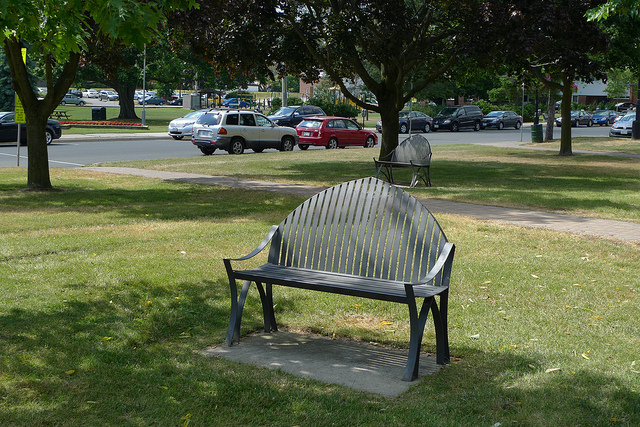

In [5]:
image_array = mmcv.imread(demo_jpg, channel_order="rgb")
Image.fromarray(image_array)

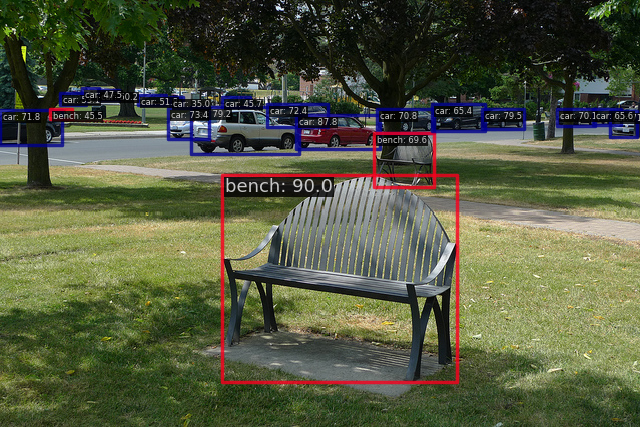

In [6]:
result = inferencer(image_array, return_vis=True)
torch.cuda.empty_cache()
Image.fromarray(result["visualization"][0])

In [7]:
# Start inspecting the model itself

In [24]:
with torch.inference_mode():
    # resized image from (427,640,3) -> (3,1280,1919). Resize smallest edge 1280
    # Resize(scale=(2048, 1280), scale_factor=None, keep_ratio=True, clip_object_border=True), backend=cv2), interpolation=bilinear)
    
    _, data = next(inferencer.preprocess([image_array]))
    data_processed = inferencer.model.data_preprocessor(data, False)
    batch_inputs = data_processed["inputs"]
    batch_data_samples = data_processed["data_samples"]
    backbone_out = inferencer.model.backbone(batch_inputs)
    neck_out = inferencer.model.neck(backbone_out)

    backbone_out2 = detr_model.backbone(batch_inputs)
    assert torch.allclose(backbone_out[0], backbone_out2[0], rtol=1e-3, atol=1e-3)
    
#     img_feats = inferencer.model.extract_feat(batch_inputs)
    for i, feat in enumerate(backbone_out):
        print(f"backbone[{i}]: {feat.shape}")
    for i, feat in enumerate(neck_out):
        print(f"neck[{i}]: {feat.shape}")
    
#     results_list = inferencer.model.query_head.predict(neck_out, batch_data_samples=batch_data_samples, rescale=True)
#     batch_data_samples = inferencer.model.add_pred_to_datasample(batch_data_samples, results_list)
torch.cuda.synchronize()

backbone[0]: torch.Size([1, 192, 320, 480])
backbone[1]: torch.Size([1, 384, 160, 240])
backbone[2]: torch.Size([1, 768, 80, 120])
backbone[3]: torch.Size([1, 1536, 40, 60])
neck[0]: torch.Size([1, 256, 320, 480])
neck[1]: torch.Size([1, 256, 160, 240])
neck[2]: torch.Size([1, 256, 80, 120])
neck[3]: torch.Size([1, 256, 40, 60])
neck[4]: torch.Size([1, 256, 20, 30])


In [26]:
backbone = detr_model.backbone
with torch.inference_mode():
    timer = benchmark.Timer(
        stmt="backbone(batch_inputs)",  # Code to benchmark
        setup="torch.cuda.synchronize()",  # Ensure prior ops are done
        globals={"backbone": backbone, "batch_inputs": batch_inputs},
    )
    results = timer.timeit(number=100)
print(results)

backbone(batch_inputs)
setup: torch.cuda.synchronize()
  159.17 ms
  1 measurement, 100 runs , 1 thread


In [10]:
# torch_tensorrt quickstart https://pytorch.org/TensorRT/getting_started/quick_start.html

In [11]:
batch_inputs.shape

torch.Size([1, 3, 1280, 1920])

In [12]:
# Dynamic shapes make the export take way too long
# dh = Dim("dh", min=480, max=1280)
# dw = Dim("dw", min=480, max=2048)
# dynamic_shapes = {
#     "x": (Dim.STATIC, Dim.STATIC, dh, dw)
# }
with torch.inference_mode():
    backbone_export = torch.export.export(
        detr_model.backbone,
        args = (batch_inputs, ),
        strict=True
    )
# print(backbone_export)
# torch.export.save(backbone_export, "backbone.pt2")
# backbone_export = torch.export.load("backbone.pt2")

I0321 22:27:24.272000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:3192] [0/0] create_env
I0321 22:27:26.207000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4547] [0/0] produce_guards
V0321 22:27:26.208000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_symint L['x'].size()[0] 1 None
V0321 22:27:26.208000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_symint L['x'].size()[1] 3 None
V0321 22:27:26.209000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_symint L['x'].size()[2] 1280 None
V0321 22:27:26.209000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_symint L['x'].size()[3] 1920 None
V0321 22:27:26.209000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_symint L['x'].stride()[0] 7372800 None
V0321 22:27:26.209000 273202 site-packages/torch/fx/experimental/symbolic_shapes.py:4755] [0/0] track_s

In [32]:
with torch.inference_mode():
    backbone_export_out = backbone_export.module()(batch_inputs)


In [34]:
torch.allclose(backbone_out[0], backbone_export_out[0], rtol=1e-3, atol=1e-3)

True

In [35]:
with torch.inference_mode():
    timer = benchmark.Timer(
        stmt="backbone_export.module()(batch_inputs)",  # Code to benchmark
        setup="torch.cuda.synchronize()",  # Ensure prior ops are done
        globals={"backbone_export": backbone_export, "batch_inputs": batch_inputs},
    )
    results = timer.timeit(number=10)
print(results)

backbone_export.module()(batch_inputs)
setup: torch.cuda.synchronize()
  194.11 ms
  1 measurement, 10 runs , 1 thread


In [14]:
# backbone_trt = torch_tensorrt.compile(backbone, ir="dynamo", inputs = [batch_inputs, ]) #  enabled_precisions={torch.float32})
backbone_trt = torch_tensorrt.dynamo.compile(backbone_export, [batch_inputs, ], enabled_precisions={torch.float32})

  getattr_node = gm.graph.get_attr(lifted_node)

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  getattr_node = gm.graph.get_attr(lifted_node)

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



  warnings.warn(

  warnings.warn(



In [41]:
with torch.inference_mode():
    backbone_trt_out = backbone_trt(batch_inputs)
assert torch.allclose(backbone_out[0], backbone_trt_out[0], rtol=1e-1, atol=1e-1)
with torch.inference_mode():
    timer = benchmark.Timer(
        stmt="backbone_trt(batch_inputs)",  # Code to benchmark
        setup="torch.cuda.synchronize()",  # Ensure prior ops are done
        globals={"backbone_trt": backbone_trt, "batch_inputs": batch_inputs},
    )
    results = timer.timeit(number=100)
print(results)

backbone_trt(batch_inputs)
setup: torch.cuda.synchronize()
  94.74 ms
  1 measurement, 100 runs , 1 thread
